# Importing Necessary Libraries

In [1]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
from torchvision import datasets
import numpy as np
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm.notebook import tqdm as tqdm
import torch.nn.functional as F
import torchvision.models as models
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter 
from torchvision.transforms import Compose, ToTensor, Normalize
import torchvision

2023-06-29 17:23:55.777101: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 17:23:55.816022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 17:23:56.437587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Model Architecture for Colored Images

In [2]:
# defining model architecture using pytroch
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes=10):
        super(CNN, self).__init__()
        self.flatten_shape = 2*2*512

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=1, stride=1,padding=0),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=1, stride=1,padding=0),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True)
        )

        self.fc = nn.Sequential(
            nn.Linear(in_features=self.flatten_shape,out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512,out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=num_classes)
        )


    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)

        x = x.view(-1, x.shape[1] * x.shape[2] * x.shape[3])
        x = self.fc(x)

        return x

# Train and Evaluate functions

In [3]:
# funciton to evaluate the model
def evaluate_CNN(model, testloader,batch_size=128):
    with torch.no_grad():
        val_loss, val_acc = 0.0, 0.0
        for val_batch in testloader:
            imgs, targets = val_batch
            imgs, targets = imgs.to(device), targets.to(device).long()
            val_outputs = model(imgs)
            val_loss += nn.CrossEntropyLoss()(val_outputs, targets).item()
            val_preds = torch.argmax(val_outputs, dim=1)
            val_acc += torch.sum(val_preds == targets)
    val_acc = float(float(val_acc) / float(len(testloader)*float(batch_size)))
    return val_acc

In [4]:
# function to Train the model
def train_CNN(model,optimizer,train_loader,val_loader,epochs):
  val_acc_vals = []
  loss_vals = []
  train_acc_vals = []
  for epoch in range(epochs):
    train_loss, train_acc = 0, 0
    print("\nEpoch: ", str(epoch+1), "/", str(epochs))

    with tqdm(total=len(train_loader)) as pbar:
        for idx, batch in enumerate(train_loader):

            images, labels = batch
            images = torch.tensor(images)
            labels = torch.tensor(labels)
            images, labels = images.to(device), labels.to(device).long()

            # forward propagation
            preds = model(images)
            loss = nn.CrossEntropyLoss()(preds, labels)

            optimizer.zero_grad()
            # backward propagation
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            acc = torch.sum(torch.argmax(preds, dim=1) == labels)
            train_acc += acc
            train_acc_rep = float(train_acc.item()/(float(batch_size)*(idx+1)))
            pbar.set_postfix(Loss='{0:.4f}'.format(loss.item()),
                             Accuracy='{0:.4f}'.format(train_acc_rep))
            pbar.update(1)

        loss_vals.append(round(float(float(train_loss)/float(len(train_loader)*float(batch_size))), 4))
        # calculating train and validation accuracies
        val_acc = evaluate_CNN(model, val_loader)
        train_acc = round(float(float(train_acc)/float(len(train_loader)*float(batch_size))), 4)
        val_acc_vals.append(val_acc)
        train_acc_vals.append(train_acc)
        print("train_acc:", train_acc, " val_acc:", round(val_acc, 4))
  return val_acc_vals,train_acc_vals,loss_vals

# FGSM, BIM and PGD Attacks Functions

In [5]:
def fgsm_attack(model, data, target, epsilon):
    # Create a new tensor as a leaf variable with the same data as data
    data_adv = torch.tensor(data.detach().clone(), requires_grad=True)

    output = model(data_adv)

    # Calculating loss between output and target label
    loss = F.cross_entropy(output, target)
    model.zero_grad()

    loss.backward()

    perturbed_data = data_adv + epsilon * data_adv.grad.sign()

    # Clipping the perturbed data to the valid pixel range [0, 1] so that the image is still valid
    perturbed_data = torch.clamp(perturbed_data, 0, 1)

    return perturbed_data


In [6]:
def bim_attack(model, loss_function, images, labels, epsilon, step_size, num_steps):
    images.requires_grad = True
    for i in range(num_steps):
        outputs = model(images)
        loss = loss_function(outputs, labels)
        grad = torch.autograd.grad(loss, images)[0]
        sign_grad = grad.sign()
        images = images + step_size * sign_grad
        images = torch.max(torch.min(images, torch.zeros_like(images) + 1), torch.zeros_like(images))
        images = torch.max(torch.min(images, images.new_ones(images.size())), images.new_zeros(images.size()))
        images = images.detach()
        images.requires_grad = True
    return images

In [7]:
def pgd_attack(model, loss_function, images, labels, epsilon, step_size, num_steps):
    images.requires_grad = True
    original_images = images.clone()
    for i in range(num_steps):
        outputs = model(images)
        loss = loss_function(outputs, labels)
        grad = torch.autograd.grad(loss, images)[0]
        sign_grad = grad.sign()
        images = images + step_size * sign_grad
        images = torch.min(torch.max(images, original_images - epsilon), original_images + epsilon)
        images = torch.clamp(images, 0, 1)
        images = images.detach()
        images.requires_grad = True
    return images

In [8]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100* (correct / total)

# IMPLEMENTATION OF ATTACKS ON CIFAR-10 DATASET

## Data Loading

In [9]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Defining data loaders
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Training

In [10]:
net = CNN(in_channels=3).to(device)
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [11]:
val_acc_vals,train_acc_vals, loss_vals = train_CNN(net,optimizer,trainloader,testloader,10)


Epoch:  1 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

/tmp/ipykernel_129864/1745915094.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images)
/tmp/ipykernel_129864/1745915094.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


train_acc: 0.3565  val_acc: 0.4487

Epoch:  2 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.547  val_acc: 0.6143

Epoch:  3 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.6633  val_acc: 0.6759

Epoch:  4 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.7298  val_acc: 0.741

Epoch:  5 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.7721  val_acc: 0.7685

Epoch:  6 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.808  val_acc: 0.7832

Epoch:  7 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.8319  val_acc: 0.789

Epoch:  8 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.8576  val_acc: 0.8029

Epoch:  9 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.8741  val_acc: 0.8085

Epoch:  10 / 10


  0%|          | 0/391 [00:00<?, ?it/s]

train_acc: 0.8926  val_acc: 0.8139


## Accuracies

In [18]:
# Evaluating the models on the test set
test_acc_cnn = test(net, testloader) 
print(f'CNN Test Accuracy: {test_acc_cnn:.3f}')

CNN Test Accuracy: 82.680


In [13]:
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Passing the perturbed images through the network to get the predictions
    outputs = net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_less_acc = 100 * correct / total    

print("Accuracy on the CIFAR10 test set without FGSM attack: ", fgsm_less_acc)

Accuracy on the CIFAR10 test set without FGSM attack:  82.68


In [14]:
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Generating perturbed images using FGSM attack
    perturbed_images = fgsm_attack(net, inputs, labels, epsilon=0.06)

    outputs = net(perturbed_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_acc = 100 * correct / total

print("CNN Test Accuracy on Adversarial Examples after FGSM attack: ", fgsm_acc)


/tmp/ipykernel_129864/967723195.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_adv = torch.tensor(data.detach().clone(), requires_grad=True)


CNN Test Accuracy on Adversarial Examples after FGSM attack:  14.88


In [23]:
# Generating adversarial examples using the BIM attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_bim = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()
for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = bim_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = bim_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_bim.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_bim = torch.cat(adv_test_cnn_bim, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_bim = test(net, DataLoader(TensorDataset(adv_test_cnn_bim, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_bim = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after BIM attack: {adv_test_acc_cnn_bim:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.3f}')

CNN Test Accuracy on Adversarial Examples after BIM attack: 0.0000000


In [24]:
# Generating adversarial examples using the PGD attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_pgd = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()

for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = pgd_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = pgd_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_pgd.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_pgd = torch.cat(adv_test_cnn_pgd, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_pgd = test(net, DataLoader(TensorDataset(adv_test_cnn_pgd, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_pgd = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after PGD attack: {adv_test_acc_cnn_pgd:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_pgd:.3f}')

CNN Test Accuracy on Adversarial Examples after PGD attack: 0.0600000


## Summary

In [24]:
print(f'Clean Test Accuracy:')
print(f'CNN Test Accuracy: {test_acc_cnn:.3f}')
# print(f'Attention CNN Test Accuracy: {test_acc_attention_cnn:.3f}')

print(f'\nFGSM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {fgsm_acc:.3f}')

print(f'\nBIM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {adv_test_acc_cnn_bim:.9f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.5f}')

print(f'\nPGD Attack Results:')
print(f"Adversarial test accuracy of CNN: {adv_test_acc_cnn_pgd:.9f}")
# print(f"Adversarial test accuracy of Attention CNN: {adv_test_acc_attention_cnn_pgd:.5f}")

Clean Test Accuracy:
CNN Test Accuracy: 81.890

FGSM Attack Results:
CNN Test Accuracy on Adversarial Examples: 13.880

BIM Attack Results:
CNN Test Accuracy on Adversarial Examples: 0.000000000

PGD Attack Results:
Adversarial test accuracy of CNN: 0.000000000


## Images plot

In [25]:
data_test, true_labels = next(iter(testloader))
data_test, true_labels = data_test.to(device), true_labels.to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


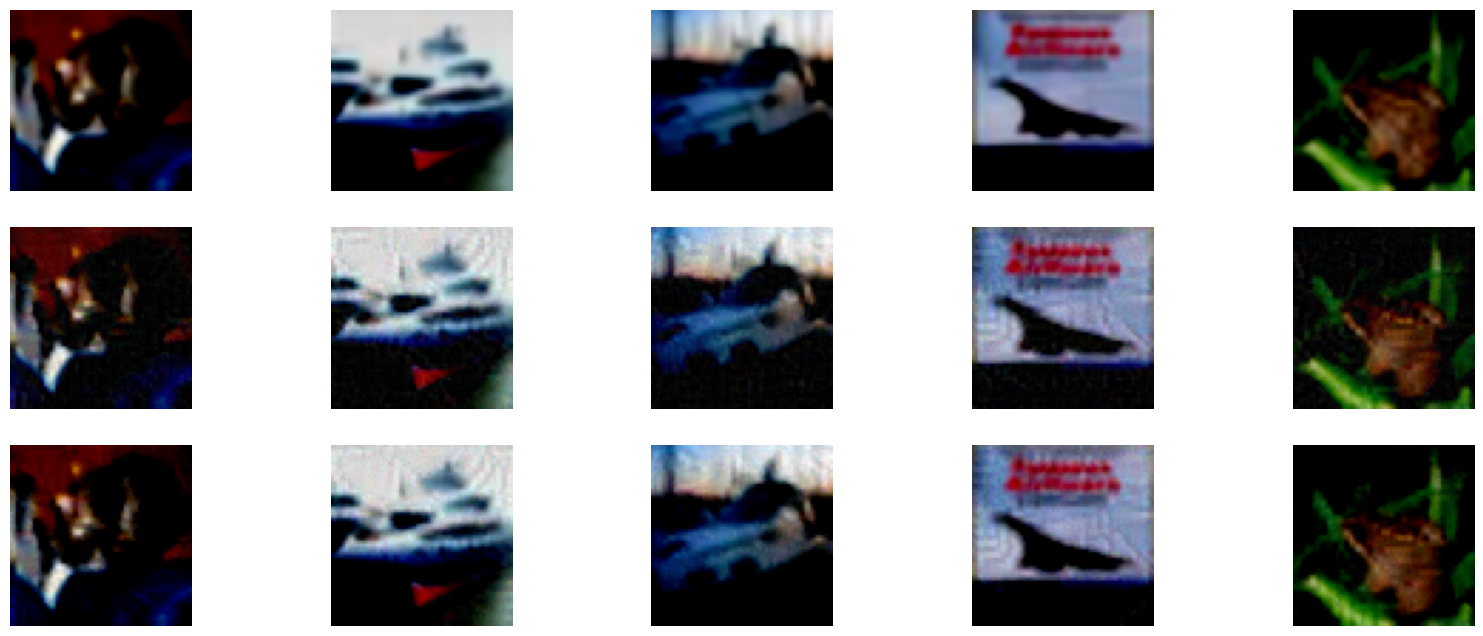

In [26]:
# plotting 5 original images and their corresponding adversarial examples generated using PGD attack.
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))

for i in range(5):
    axs[0, i].imshow(data_test[i].permute(1, 2, 0).cpu().numpy())
    axs[0, i].axis('off')
    axs[1, i].imshow(adv_test_cnn_bim[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[1, i].axis('off')
    axs[2, i].imshow(adv_test_cnn_pgd[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[2, i].axis('off')  
plt.show()

# IMPLEMENTATION OF ATTACKS ON SVHN DATASET

In [9]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Loading CIFAR-10 dataset
trainset = torchvision.datasets.SVHN(root='./data', split = 'train',
                                        download=True, transform=transform)
testset = torchvision.datasets.SVHN(root='./data', split = 'test',
                                       download=True, transform=transform)

# Defining data loaders
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [10]:
net = CNN(in_channels = 3).to(device)
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [11]:
val_acc_vals,train_acc_vals, loss_vals = train_CNN(net,optimizer,trainloader,testloader,10)


Epoch:  1 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

/tmp/ipykernel_135111/1745915094.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images)
/tmp/ipykernel_135111/1745915094.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


train_acc: 0.6617  val_acc: 0.8824

Epoch:  2 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9047  val_acc: 0.8992

Epoch:  3 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9257  val_acc: 0.9204

Epoch:  4 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.939  val_acc: 0.927

Epoch:  5 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9458  val_acc: 0.9251

Epoch:  6 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9536  val_acc: 0.9375

Epoch:  7 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9607  val_acc: 0.93

Epoch:  8 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9656  val_acc: 0.94

Epoch:  9 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.9686  val_acc: 0.9373

Epoch:  10 / 10


  0%|          | 0/573 [00:00<?, ?it/s]

train_acc: 0.972  val_acc: 0.938


In [12]:
## Accuracies
# Evaluating the models on the test set
test_acc_cnn = test(net, testloader) 
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Passing the perturbed images through the network to get the predictions
    outputs = net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_less_acc = 100 * correct / total    

print("CNN Test Accuracy on Adversarial Examples before FGSM attack: ", fgsm_less_acc)
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Generating perturbed images using FGSM attack
    perturbed_images = fgsm_attack(net, inputs, labels, epsilon=0.06)

    outputs = net(perturbed_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_acc = 100 * correct / total

print("CNN Test Accuracy on Adversarial Examples after FGSM attack: ", fgsm_acc)

# Generating adversarial examples using the BIM attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_bim = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()
for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = bim_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = bim_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_bim.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_bim = torch.cat(adv_test_cnn_bim, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_bim = test(net, DataLoader(TensorDataset(adv_test_cnn_bim, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_bim = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after BIM attack: {adv_test_acc_cnn_bim:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.3f}')
# Generating adversarial examples using the PGD attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_pgd = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()

for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = pgd_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = pgd_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_pgd.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_pgd = torch.cat(adv_test_cnn_pgd, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_pgd = test(net, DataLoader(TensorDataset(adv_test_cnn_pgd, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_pgd = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after PGD attack: {adv_test_acc_cnn_pgd:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_pgd:.3f}')

CNN Test Accuracy on Adversarial Examples before FGSM attack:  94.06883835279656


/tmp/ipykernel_135111/967723195.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_adv = torch.tensor(data.detach().clone(), requires_grad=True)


CNN Test Accuracy on Adversarial Examples after FGSM attack:  32.183466502765825
CNN Test Accuracy on Adversarial Examples after BIM attack: 0.2112784
CNN Test Accuracy on Adversarial Examples after PGD attack: 7.5599262


In [13]:
## Summary
print(f'Clean Test Accuracy:')
print(f'CNN Test Accuracy: {test_acc_cnn:.3f}')
# print(f'Attention CNN Test Accuracy: {test_acc_attention_cnn:.3f}')

print(f'\nFGSM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {fgsm_acc:.3f}')

print(f'\nBIM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {adv_test_acc_cnn_bim:.9f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.5f}')

print(f'\nPGD Attack Results:')
print(f"Adversarial test accuracy of CNN: {adv_test_acc_cnn_pgd:.9f}")
# print(f"Adversarial test accuracy of Attention CNN: {adv_test_acc_attention_cnn_pgd:.5f}")

Clean Test Accuracy:
CNN Test Accuracy: 94.069

FGSM Attack Results:
CNN Test Accuracy on Adversarial Examples: 32.183

BIM Attack Results:
CNN Test Accuracy on Adversarial Examples: 0.211278427

PGD Attack Results:
Adversarial test accuracy of CNN: 7.559926245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


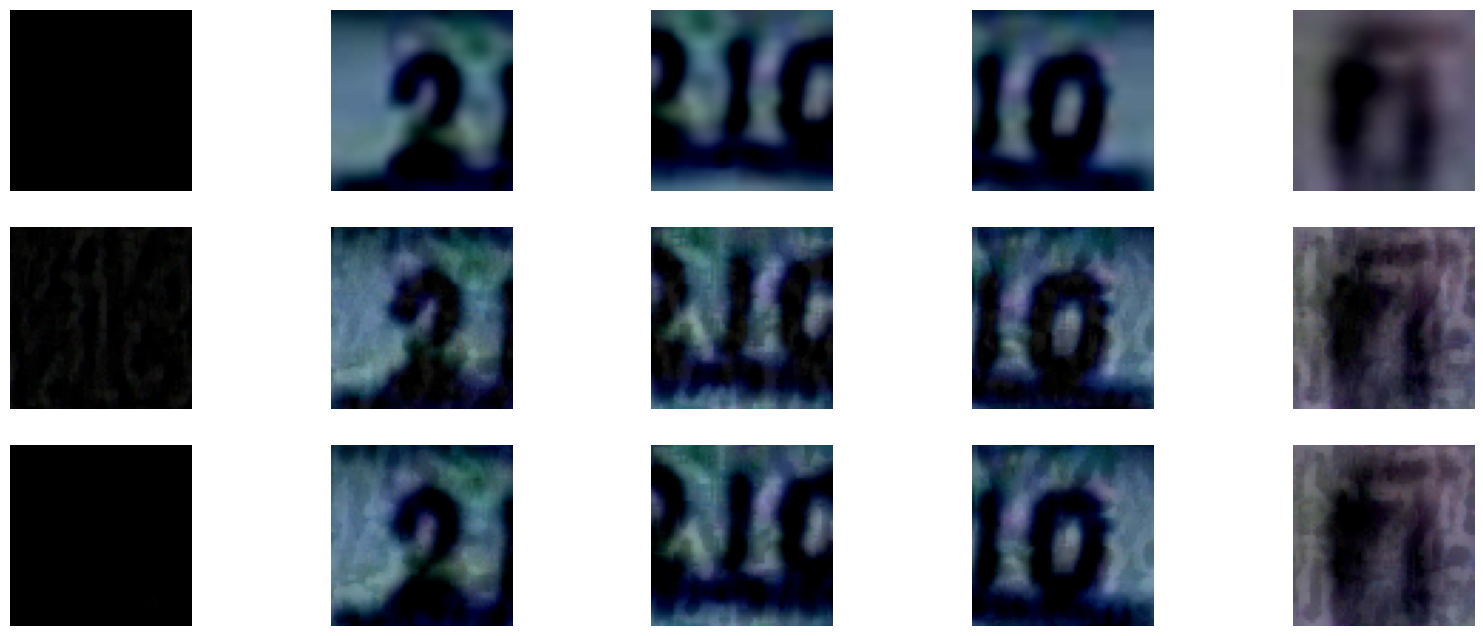

In [14]:
## Images plot
data_test, true_labels = next(iter(testloader))
data_test, true_labels = data_test.to(device), true_labels.to(device)
# plotting 5 original images and their corresponding adversarial examples generated using PGD attack.
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))

for i in range(5):
    axs[0, i].imshow(data_test[i].permute(1, 2, 0).cpu().numpy())
    axs[0, i].axis('off')
    axs[1, i].imshow(adv_test_cnn_bim[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[1, i].axis('off')
    axs[2, i].imshow(adv_test_cnn_pgd[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[2, i].axis('off')  
plt.show()

# IMPLEMENTATION OF ATTACKS ON MNIST DATASET

In [15]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Grayscale()
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Loading CIFAR-10 dataset
trainset = torchvision.datasets.MNIST(root='./data', train = True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train = False,
                                       download=True, transform=transform)

# Defining data loaders
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [16]:
net = CNN(in_channels = 1).to(device)
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [17]:
val_acc_vals,train_acc_vals, loss_vals = train_CNN(net,optimizer,trainloader,testloader,10)


Epoch:  1 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

/tmp/ipykernel_135111/1745915094.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images)
/tmp/ipykernel_135111/1745915094.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


train_acc: 0.9426  val_acc: 0.9731

Epoch:  2 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9832  val_acc: 0.9723

Epoch:  3 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9874  val_acc: 0.9788

Epoch:  4 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9894  val_acc: 0.9785

Epoch:  5 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9897  val_acc: 0.9796

Epoch:  6 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9909  val_acc: 0.9776

Epoch:  7 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9925  val_acc: 0.9789

Epoch:  8 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9923  val_acc: 0.9813

Epoch:  9 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9921  val_acc: 0.9804

Epoch:  10 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9931  val_acc: 0.98


In [18]:
## Accuracies
# Evaluating the models on the test set
test_acc_cnn = test(net, testloader) 
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Passing the perturbed images through the network to get the predictions
    outputs = net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_less_acc = 100 * correct / total    

print("CNN Test Accuracy on Adversarial Examples before FGSM attack: ", fgsm_less_acc)
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Generating perturbed images using FGSM attack
    perturbed_images = fgsm_attack(net, inputs, labels, epsilon=0.06)

    outputs = net(perturbed_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_acc = 100 * correct / total

print("CNN Test Accuracy on Adversarial Examples after FGSM attack: ", fgsm_acc)

# Generating adversarial examples using the BIM attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_bim = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()
for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = bim_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = bim_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_bim.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_bim = torch.cat(adv_test_cnn_bim, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_bim = test(net, DataLoader(TensorDataset(adv_test_cnn_bim, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_bim = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after BIM attack: {adv_test_acc_cnn_bim:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.3f}')
# Generating adversarial examples using the PGD attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_pgd = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()

for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = pgd_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = pgd_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_pgd.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_pgd = torch.cat(adv_test_cnn_pgd, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_pgd = test(net, DataLoader(TensorDataset(adv_test_cnn_pgd, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_pgd = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after PGD attack: {adv_test_acc_cnn_pgd:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_pgd:.3f}')

CNN Test Accuracy on Adversarial Examples before FGSM attack:  99.04


/tmp/ipykernel_135111/967723195.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_adv = torch.tensor(data.detach().clone(), requires_grad=True)


CNN Test Accuracy on Adversarial Examples after FGSM attack:  82.3
CNN Test Accuracy on Adversarial Examples after BIM attack: 6.7600000
CNN Test Accuracy on Adversarial Examples after PGD attack: 23.9300000


In [19]:
## Summary
print(f'Clean Test Accuracy:')
print(f'CNN Test Accuracy: {test_acc_cnn:.3f}')
# print(f'Attention CNN Test Accuracy: {test_acc_attention_cnn:.3f}')

print(f'\nFGSM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {fgsm_acc:.3f}')

print(f'\nBIM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {adv_test_acc_cnn_bim:.9f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.5f}')

print(f'\nPGD Attack Results:')
print(f"Adversarial test accuracy of CNN: {adv_test_acc_cnn_pgd:.9f}")
# print(f"Adversarial test accuracy of Attention CNN: {adv_test_acc_attention_cnn_pgd:.5f}")

Clean Test Accuracy:
CNN Test Accuracy: 99.040

FGSM Attack Results:
CNN Test Accuracy on Adversarial Examples: 82.300

BIM Attack Results:
CNN Test Accuracy on Adversarial Examples: 6.760000000

PGD Attack Results:
Adversarial test accuracy of CNN: 23.930000000


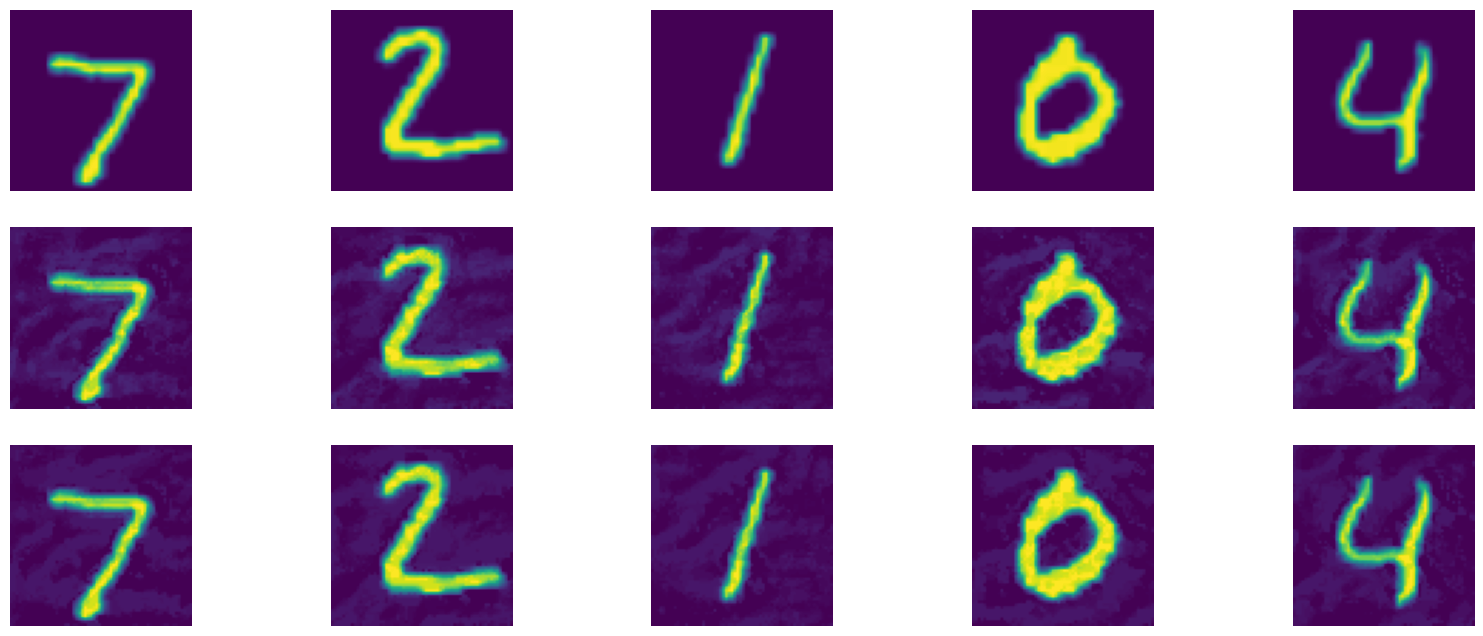

In [20]:
## Images plot
data_test, true_labels = next(iter(testloader))
data_test, true_labels = data_test.to(device), true_labels.to(device)
# plotting 5 original images and their corresponding adversarial examples generated using PGD attack.
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))

for i in range(5):
    axs[0, i].imshow(data_test[i].permute(1, 2, 0).cpu().numpy())
    axs[0, i].axis('off')
    axs[1, i].imshow(adv_test_cnn_bim[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[1, i].axis('off')
    axs[2, i].imshow(adv_test_cnn_pgd[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[2, i].axis('off')  
plt.show()

# IMPLEMENTATION OF ATTACKS ON FASHIONMNIST DATASET

In [21]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Grayscale()
])


# Loading CIFAR-10 dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train = True,
                                        download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train = False,
                                       download=True, transform=transform)

# Defining data loaders
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [22]:
net = CNN(in_channels = 1).to(device)
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [23]:
val_acc_vals,train_acc_vals, loss_vals = train_CNN(net,optimizer,trainloader,testloader,10)


Epoch:  1 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

/tmp/ipykernel_135111/1745915094.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images)
/tmp/ipykernel_135111/1745915094.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


train_acc: 0.8115  val_acc: 0.8784

Epoch:  2 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.8958  val_acc: 0.8908

Epoch:  3 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9124  val_acc: 0.9009

Epoch:  4 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9208  val_acc: 0.9098

Epoch:  5 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9288  val_acc: 0.9128

Epoch:  6 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9335  val_acc: 0.916

Epoch:  7 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9401  val_acc: 0.918

Epoch:  8 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9454  val_acc: 0.9163

Epoch:  9 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9474  val_acc: 0.9184

Epoch:  10 / 10


  0%|          | 0/469 [00:00<?, ?it/s]

train_acc: 0.9533  val_acc: 0.9128


In [24]:
## Accuracies
# Evaluating the models on the test set
test_acc_cnn = test(net, testloader) 
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Passing the perturbed images through the network to get the predictions
    outputs = net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_less_acc = 100 * correct / total    

print("CNN Test Accuracy on Adversarial Examples before FGSM attack: ", fgsm_less_acc)
correct = 0
total = 0

for inputs, labels in testloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Generating perturbed images using FGSM attack
    perturbed_images = fgsm_attack(net, inputs, labels, epsilon=0.06)

    outputs = net(perturbed_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
fgsm_acc = 100 * correct / total

print("CNN Test Accuracy on Adversarial Examples after FGSM attack: ", fgsm_acc)

# Generating adversarial examples using the BIM attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_bim = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()
for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = bim_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = bim_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_bim.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_bim = torch.cat(adv_test_cnn_bim, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_bim = test(net, DataLoader(TensorDataset(adv_test_cnn_bim, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_bim = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after BIM attack: {adv_test_acc_cnn_bim:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.3f}')
# Generating adversarial examples using the PGD attack
eps = 0.06
step_size = 0.01
num_steps = 10

adv_test_cnn_pgd = []
adv_test_attention_cnn = []
true_labels = []
criterion = nn.CrossEntropyLoss()

for images, labels in testloader:
    true_labels.append(labels)
    images, labels = images.to(device), labels.to(device)
    adv_images_cnn = pgd_attack(net, criterion, images, labels, eps, step_size, num_steps)
    # adv_images_attention_cnn = pgd_attack(attention_net, criterion, images, labels, eps, step_size, num_steps)
    adv_test_cnn_pgd.append(adv_images_cnn)
    # adv_test_attention_cnn.append(adv_images_attention_cnn)

# Concatenate the adversarial examples and true labels into tensors
adv_test_cnn_pgd = torch.cat(adv_test_cnn_pgd, dim=0)
# adv_test_attention_cnn = torch.cat(adv_test_attention_cnn, dim=0)
true_labels = torch.cat(true_labels, dim=0)

# Evaluate the models on the adversarial examples
adv_test_acc_cnn_pgd = test(net, DataLoader(TensorDataset(adv_test_cnn_pgd, true_labels), batch_size=128))
# adv_test_acc_attention_cnn_pgd = test(attention_net, DataLoader(TensorDataset(adv_test_attention_cnn, true_labels), batch_size=128))

print(f'CNN Test Accuracy on Adversarial Examples after PGD attack: {adv_test_acc_cnn_pgd:.7f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_pgd:.3f}')

CNN Test Accuracy on Adversarial Examples before FGSM attack:  92.39


/tmp/ipykernel_135111/967723195.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_adv = torch.tensor(data.detach().clone(), requires_grad=True)


CNN Test Accuracy on Adversarial Examples after FGSM attack:  15.03
CNN Test Accuracy on Adversarial Examples after BIM attack: 0.5900000
CNN Test Accuracy on Adversarial Examples after PGD attack: 0.6200000


In [25]:
## Summary
print(f'Clean Test Accuracy:')
print(f'CNN Test Accuracy: {test_acc_cnn:.3f}')
# print(f'Attention CNN Test Accuracy: {test_acc_attention_cnn:.3f}')

print(f'\nFGSM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {fgsm_acc:.3f}')

print(f'\nBIM Attack Results:')
print(f'CNN Test Accuracy on Adversarial Examples: {adv_test_acc_cnn_bim:.9f}')
# print(f'Attention CNN Test Accuracy on Adversarial Examples: {adv_test_acc_attention_cnn_bim:.5f}')

print(f'\nPGD Attack Results:')
print(f"Adversarial test accuracy of CNN: {adv_test_acc_cnn_pgd:.9f}")
# print(f"Adversarial test accuracy of Attention CNN: {adv_test_acc_attention_cnn_pgd:.5f}")

Clean Test Accuracy:
CNN Test Accuracy: 92.390

FGSM Attack Results:
CNN Test Accuracy on Adversarial Examples: 15.030

BIM Attack Results:
CNN Test Accuracy on Adversarial Examples: 0.590000000

PGD Attack Results:
Adversarial test accuracy of CNN: 0.620000000


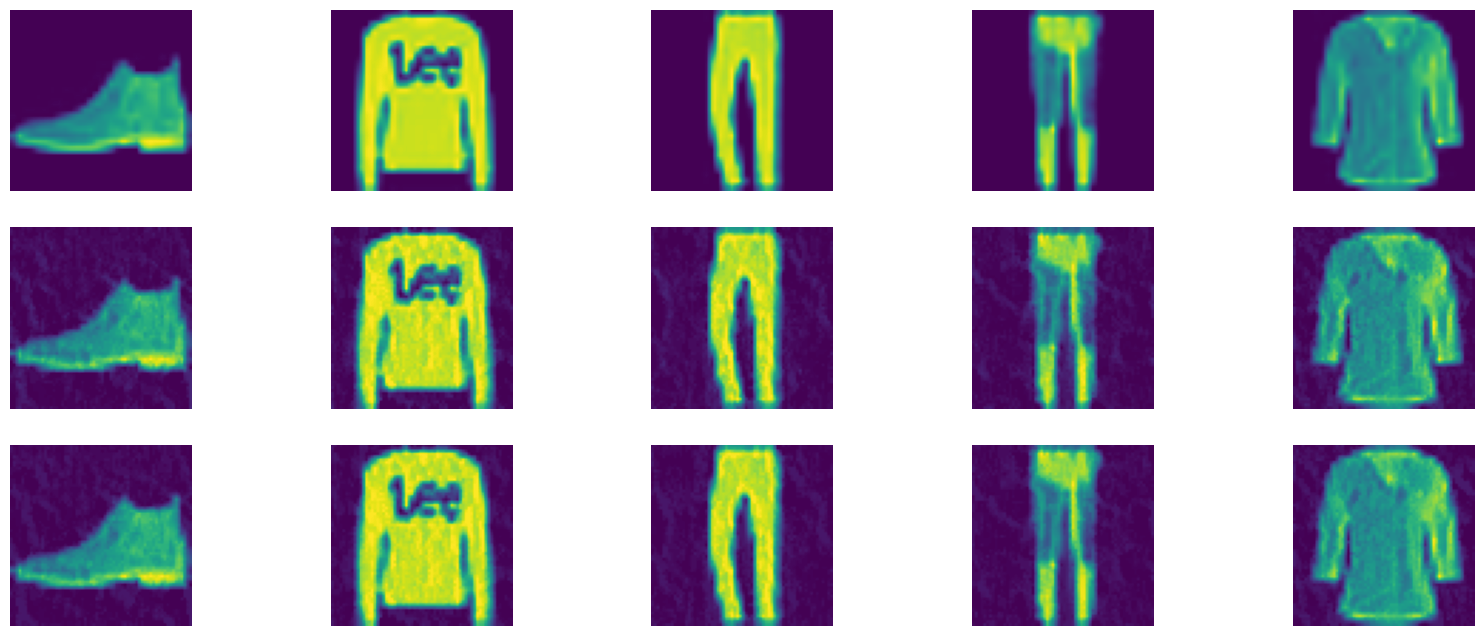

In [26]:
## Images plot
data_test, true_labels = next(iter(testloader))
data_test, true_labels = data_test.to(device), true_labels.to(device)
# plotting 5 original images and their corresponding adversarial examples generated using PGD attack.
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))

for i in range(5):
    axs[0, i].imshow(data_test[i].permute(1, 2, 0).cpu().numpy())
    axs[0, i].axis('off')
    axs[1, i].imshow(adv_test_cnn_bim[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[1, i].axis('off')
    axs[2, i].imshow(adv_test_cnn_pgd[i].detach().permute(1, 2, 0).cpu().numpy())
    axs[2, i].axis('off')  
plt.show()